## Import

In [1]:
library(ggplot2)
library(ggprism)
library(gplots)
library(here)
library(loomR)
library(Seurat)
library(SeuratDisk)
library(tidyverse)
library(viridis)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


here() starts at /Users/shao/Library/CloudStorage/OneDrive-Personal/PythonScripts/Experiment Project/GitHub/scRNA co-expression correlation

Loading required package: R6

Loading required package: hdf5r

Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attaching package: ‘SeuratDisk’


The following object is masked from ‘package:loomR’:

    loom


── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() 

## Setup the Seurat object from Robj

In [22]:
# filename for MacOs
filname = "~/Documents/RNA-seq Data/Tabula Muris/facs_Bladder_seurat_tiss.Robj"

In [ ]:
# filename for Win Os
filname = "C/Users/shaoDocuments/RNA-seq Data/Tabula Muris/droplet_Bladder_seurat_tiss.Robj"

In [23]:
load(filname, verbose = TRUE)

Loading objects:
  tiss


In [24]:
tiss

An old seurat object
 23341 genes across 1378 samples

In [25]:
colnames(tiss@meta.data)

[1] "nGene"               "nReads"              "orig.ident"         
 [4] "plate.barcode"       "mouse.id"            "tissue"             
 [7] "subtissue"           "FACS.selection"      "mouse.sex"          
[10] "percent.ercc"        "free_annotation"     "cell_ontology_class"
[13] "percent.ribo"        "res.0.4"             "cluster.ids"        
[16] "cell_ontology_id"

In [26]:
head(tiss@meta.data)
head(tiss@raw.data)

nGene nReads  orig.ident plate.barcode mouse.id tissue 
A1.B000610.3_56_F.1.1   2569   610727 Bladder    B000610       3_56_F   Bladder
A1.B002764.3_38_F.1.1    578   320035 Bladder    B002764       3_38_F   Bladder
A1.B002771.3_39_F.1.1   3998  1044981 Bladder    B002771       3_39_F   Bladder
A1.D041914.3_8_M.1.1    3401   447232 Bladder    D041914       3_8_M    Bladder
A1.D042253.3_9_M.1.1    4439   330249 Bladder    D042253       3_9_M    Bladder
A1.MAA000487.3_10_M.1.1 4471   748761 Bladder    MAA000487     3_10_M   Bladder
                        subtissue FACS.selection mouse.sex percent.ercc
A1.B000610.3_56_F.1.1             Multiple       F         0.024547354 
A1.B002764.3_38_F.1.1             Multiple       F         0.428984095 
A1.B002771.3_39_F.1.1             Multiple       F         0.011236157 
A1.D041914.3_8_M.1.1              Multiple       M         0.020742054 
A1.D042253.3_9_M.1.1              Multiple       M         0.008159992 
A1.MAA000487.3_10_M.1.1           Multiple       M         0.008691611 
                        free_annotation                 cell_ontology_class    
A1.B000610.3_56_F.1.1   Bladder mesenchymal cell        bladder cell           
A1.B002764.3_38_F.1.1   Luminal bladder epithelial cell bladder urothelial cell
A1.B002771.3_39_F.1.1   Bladder mesenchymal cell        bladder cell           
A1.D041914.3_8_M.1.1    Bladder mesenchymal cell        bladder cell           
A1.D042253.3_9_M.1.1    Bladder mesenchymal cell        bladder cell           
A1.MAA000487.3_10_M.1.1 Bladder mesenchymal cell        bladder cell           
                        percent.ribo res.0.4 cluster.ids cell_ontology_id
A1.B000610.3_56_F.1.1   0.036029191  5       5           CL:1001319      
A1.B002764.3_38_F.1.1   0.002490353  3       3           CL:1001428      
A1.B002771.3_39_F.1.1   0.018430957  5       5           CL:1001319      
A1.D041914.3_8_M.1.1    0.047554737  5       5           CL:1001319      
A1.D042253.3_9_M.1.1    0.013950080  2       2           CL:1001319      
A1.MAA000487.3_10_M.1.1 0.024045056  0       0           CL:1001319

A1.B000610.3_56_F.1.1 A1.B002764.3_38_F.1.1 A1.B002771.3_39_F.1.1
0610005C13Rik  0                    0                       0                  
0610007C21Rik  0                    0                     431                  
0610007L01Rik 25                    0                      42                  
0610007N19Rik 26                    0                       1                  
0610007P08Rik  0                    0                       0                  
0610007P14Rik  0                    0                       0                  
              A1.D041914.3_8_M.1.1 A1.D042253.3_9_M.1.1 A1.MAA000487.3_10_M.1.1
0610005C13Rik   0                   0                     0                    
0610007C21Rik 190                  46                   111                    
0610007L01Rik   0                   9                     0                    
0610007N19Rik  10                   4                    66                    
0610007P08Rik   4                   0                    11                    
0610007P14Rik  63                   8                     0                    
              A10.B000610.3_56_F.1.1 A10.B002764.3_38_F.1.1
0610005C13Rik   0                       0                  
0610007C21Rik 129                    1264                  
0610007L01Rik   9                       6                  
0610007N19Rik   1                       0                  
0610007P08Rik   2                       0                  
0610007P14Rik  26                       0                  
              A10.B002771.3_39_F.1.1 A10.D041914.3_8_M.1.1 ⋯
0610005C13Rik   0                      0                   ⋯
0610007C21Rik 154                    267                   ⋯
0610007L01Rik 155                     21                   ⋯
0610007N19Rik   0                    107                   ⋯
0610007P08Rik   0                      0                   ⋯
0610007P14Rik   4                      0                   ⋯
              P8.B002764.3_38_F.1.1 P8.B002771.3_39_F.1.1 P8.D041914.3_8_M.1.1
0610005C13Rik   0                   0                       0                 
0610007C21Rik 330                   0                     174                 
0610007L01Rik   0                   0                      76                 
0610007N19Rik   0                   0                      50                 
0610007P08Rik   0                   0                       2                 
0610007P14Rik 749                   0                       0                 
              P8.D042253.3_9_M.1.1 P8.MAA000487.3_10_M.1.1
0610005C13Rik   0                    0                    
0610007C21Rik 102                   64                    
0610007L01Rik  73                  191                    
0610007N19Rik  55                    0                    
0610007P08Rik   2                    0                    
0610007P14Rik  36                   52                    
              P9.B000610.3_56_F.1.1 P9.B002764.3_38_F.1.1 P9.B002771.3_39_F.1.1
0610005C13Rik   0                   0                       0                  
0610007C21Rik 104                   0                     181                  
0610007L01Rik   0                   0                       1                  
0610007N19Rik   0                   0                       0                  
0610007P08Rik   0                   0                       0                  
0610007P14Rik  67                   0                      26                  
              P9.D042253.3_9_M.1.1 P9.MAA000487.3_10_M.1.1
0610005C13Rik  0                     0                    
0610007C21Rik 45                    73                    
0610007L01Rik  2                   112                    
0610007N19Rik  9                     0                    
0610007P08Rik  0                     0                    
0610007P14Rik  0                    56

In [27]:
seu <- UpdateSeuratObject(tiss)

Updating from v2.X to v3.X

Validating object structure

Updating object slots

Ensuring keys are in the proper strucutre

Ensuring feature names don't have underscores or pipes

Object representation is consistent with the most current Seurat version



In [28]:
seu

An object of class Seurat 
23341 features across 1378 samples within 1 assay 
Active assay: RNA (23341 features, 5479 variable features)
 2 dimensional reductions calculated: pca, tsne

In [29]:
head(seu@assays$RNA@data)

   [[ suppressing 1378 column names ‘A1.B000610.3_56_F.1.1’, ‘A1.B002764.3_38_F.1.1’, ‘A1.B002771.3_39_F.1.1’ ... ]]



6 x 1378 sparse Matrix of class "dgCMatrix"
                                                                       
0610005C13Rik .        . .         .        .        .        .        
0610007C21Rik .        . 6.0245310 6.054053 4.943703 5.005589 4.4751421
0610007L01Rik 3.736117 . 3.7182469 .        3.341170 .        1.9539219
0610007N19Rik 3.774420 . 0.6713898 3.151015 2.573533 4.490271 0.5145724
0610007P08Rik .        . .         2.296960 .        2.753083 0.8526462
0610007P14Rik .        . .         4.954886 3.227802 .        2.9175545
                                                                             
0610005C13Rik .         .        .        .        .        .        .       
0610007C21Rik 5.8144307 5.096496 5.624567 4.560989 4.123244 4.374412 7.812887
0610007L01Rik 0.9500815 5.102929 3.123239 4.270790 4.948266 .        .       
0610007N19Rik .         .        4.715528 3.465284 .        .        .       
0610007P08Rik .         .        .        .        .        . 

In [43]:
colnames(seu@meta.data)

[1] "nReads"                       "orig.ident"                  
 [3] "plate.barcode"                "mouse.id"                    
 [5] "tissue"                       "subtissue"                   
 [7] "FACS.selection"               "mouse.sex"                   
 [9] "percent.ercc"                 "free_annotation"             
[11] "cell_ontology_class"          "percent.ribo"                
[13] "res.1.5"                      "cluster.ids"                 
[15] "cell_ontology_id"             "nCount_RNA"                  
[17] "nFeature_RNA"                 "res.0.4"                     
[19] "res.0.5"                      "figshare_annotation"         
[21] "subsetA"                      "subsetA_cluster.ids"         
[23] "res.0.3"                      "res.2.5"                     
[25] "previous_cell_ontology_class" "res.0.7"                     
[27] "res.1"                        "res.3"                       
[29] "previous_free_annotation"     "subsetB"                     
[31] "subsetB_cluster.ids"          "subsetC"                     
[33] "subsetC_cluster.ids"          "subsetD"                     
[35] "subsetD_cluster.ids"          "subsetE"                     
[37] "subsetE_cluster.ids"          "res.0.2"                     
[39] "RNA_snn_res.0.5"              "seurat_clusters"

In [31]:
unique(seu@meta.data$cell_type)

NULL

In [32]:
saveRDS(seu, "Aorta.RDS")

In [5]:
all_file <- c("Aorta", "Bladder", "Brain_Myeloid", "Brain_Non-Myeloid", "Diaphragm",
    "Fat", "Heart", "Kidney", "Large_Intestine", "Limb_Muscle", "Liver", "Lung",
    "Mammary_Gland", "Marrow", "Pancreas", "Skin", "Spleen", "Thymus", "Tongue",
    "Trachea")

In [6]:
for (i in all_file[20 ]) {
    infile <- paste("~/Documents/RNA-seq Data/Tabula Muris/facs_", i, "_seurat_tiss.Robj",
        sep = "")
    print(paste("The input file name is ", infile))
    load(infile, verbose = TRUE)
    seu <- UpdateSeuratObject(tiss)
    outfile <- paste(i, ".RDS", sep = "")
    print(paste("The output file name is ", outfile))
    saveRDS(seu, outfile)
}

[1] "The input file name is  ~/Documents/RNA-seq Data/Tabula Muris/facs_Trachea_seurat_tiss.Robj"
Loading objects:
  tiss


Updating from v2.X to v3.X

Validating object structure

Updating object slots

Ensuring keys are in the proper strucutre

Ensuring feature names don't have underscores or pipes

Object representation is consistent with the most current Seurat version



[1] "The output file name is  Trachea.RDS"


## Merge objects

In [13]:
pathname = "~/Documents/RNA-seq Data/Tabula Muris/"

In [14]:
all_file <- c("Aorta", "Bladder", "Brain_Myeloid", "Brain_Non_Myeloid", "Diaphragm",
    "Fat", "Heart", "Kidney", "Large_Intestine", "Limb_Muscle", "Liver", "Lung",
    "Mammary_Gland", "Marrow", "Pancreas", "Skin", "Spleen", "Thymus", "Tongue",
    "Trachea")

In [15]:
all_file

[1] "Aorta"             "Bladder"           "Brain_Myeloid"    
 [4] "Brain_Non_Myeloid" "Diaphragm"         "Fat"              
 [7] "Heart"             "Kidney"            "Large_Intestine"  
[10] "Limb_Muscle"       "Liver"             "Lung"             
[13] "Mammary_Gland"     "Marrow"            "Pancreas"         
[16] "Skin"              "Spleen"            "Thymus"           
[19] "Tongue"            "Trachea"

In [16]:
for (i in all_file) {
    infile <- paste(pathname, i, ".RDS", sep = "")
    print(paste("The input file name is ", infile))
    outfile <- paste0("seu.", i)
    print(paste("The output file name is ", outfile))
    assign(outfile, readRDS(infile))
}
ls()

[1] "The input file name is  ~/Documents/RNA-seq Data/Tabula Muris/Aorta.RDS"
[1] "The output file name is  seu.Aorta"
[1] "The input file name is  ~/Documents/RNA-seq Data/Tabula Muris/Bladder.RDS"
[1] "The output file name is  seu.Bladder"
[1] "The input file name is  ~/Documents/RNA-seq Data/Tabula Muris/Brain_Myeloid.RDS"
[1] "The output file name is  seu.Brain_Myeloid"
[1] "The input file name is  ~/Documents/RNA-seq Data/Tabula Muris/Brain_Non_Myeloid.RDS"
[1] "The output file name is  seu.Brain_Non_Myeloid"
[1] "The input file name is  ~/Documents/RNA-seq Data/Tabula Muris/Diaphragm.RDS"
[1] "The output file name is  seu.Diaphragm"
[1] "The input file name is  ~/Documents/RNA-seq Data/Tabula Muris/Fat.RDS"
[1] "The output file name is  seu.Fat"
[1] "The input file name is  ~/Documents/RNA-seq Data/Tabula Muris/Heart.RDS"
[1] "The output file name is  seu.Heart"
[1] "The input file name is  ~/Documents/RNA-seq Data/Tabula Muris/Kidney.RDS"
[1] "The output file name is  seu.Kidney

[1] "all_file"                  "i"                        
 [3] "infile"                    "outfile"                  
 [5] "pathname"                  "seu.Aorta"                
 [7] "seu.Aorta.RDS"             "seu.Bladder"              
 [9] "seu.Bladder.RDS"           "seu.Brain_Myeloid"        
[11] "seu.Brain_Myeloid.RDS"     "seu.Brain_Non_Myeloid"    
[13] "seu.Brain_Non-Myeloid"     "seu.Brain_Non-Myeloid.RDS"
[15] "seu.Diaphragm"             "seu.Diaphragm.RDS"        
[17] "seu.Fat"                   "seu.Fat.RDS"              
[19] "seu.Heart"                 "seu.Heart.RDS"            
[21] "seu.Kidney"                "seu.Kidney.RDS"           
[23] "seu.Large_Intestine"       "seu.Large_Intestine.RDS"  
[25] "seu.Limb_Muscle"           "seu.Limb_Muscle.RDS"      
[27] "seu.Liver"                 "seu.Liver.RDS"            
[29] "seu.Lung"                  "seu.Lung.RDS"             
[31] "seu.Mammary_Gland"         "seu.Mammary_Gland.RDS"    
[33] "seu.Marrow"                "seu.Marrow.RDS"           
[35] "seu.Pancreas"              "seu.Pancreas.RDS"         
[37] "seu.Skin"                  "seu.Skin.RDS"             
[39] "seu.Spleen"                "seu.Spleen.RDS"           
[41] "seu.Thymus"                "seu.Thymus.RDS"           
[43] "seu.Tongue"                "seu.Tongue.RDS"           
[45] "seu.Trachea"               "seu.Trachea.RDS"

In [19]:
seu <- merge(x = seu.Aorta, y = list(seu.Bladder, seu.Brain_Myeloid, seu.Brain_Non_Myeloid,
    seu.Diaphragm, seu.Fat, seu.Heart, seu.Kidney, seu.Large_Intestine, seu.Limb_Muscle,
    seu.Liver, seu.Lung, seu.Mammary_Gland, seu.Marrow, seu.Pancreas, seu.Skin, seu.Spleen,
    seu.Thymus, seu.Tongue, seu.Trachea), add.cell.ids = c("Aorta", "Bladder", "Brain_Myeloid",
    "Brain_Non_Myeloid", "Diaphragm", "Fat", "Heart", "Kidney", "Large_Intestine",
    "Limb_Muscle", "Liver", "Lung", "Mammary_Gland", "Marrow", "Pancreas", "Skin",
    "Spleen", "Thymus", "Tongue", "Trachea"))

In [20]:
seu

An object of class Seurat 
23341 features across 44949 samples within 1 assay 
Active assay: RNA (23341 features, 0 variable features)

In [21]:
colnames(seu@meta.data)

[1] "nReads"                       "orig.ident"                  
 [3] "plate.barcode"                "mouse.id"                    
 [5] "tissue"                       "subtissue"                   
 [7] "FACS.selection"               "mouse.sex"                   
 [9] "percent.ercc"                 "free_annotation"             
[11] "cell_ontology_class"          "percent.ribo"                
[13] "res.1.5"                      "cluster.ids"                 
[15] "cell_ontology_id"             "nCount_RNA"                  
[17] "nFeature_RNA"                 "res.0.4"                     
[19] "res.0.5"                      "figshare_annotation"         
[21] "subsetA"                      "subsetA_cluster.ids"         
[23] "res.0.3"                      "res.2.5"                     
[25] "previous_cell_ontology_class" "res.0.7"                     
[27] "res.1"                        "res.3"                       
[29] "previous_free_annotation"     "subsetB"                     
[31] "subsetB_cluster.ids"          "subsetC"                     
[33] "subsetC_cluster.ids"          "subsetD"                     
[35] "subsetD_cluster.ids"          "subsetE"                     
[37] "subsetE_cluster.ids"          "res.0.2"

In [22]:
unique(seu@meta.data$tissue)

[1] "Heart"             "Bladder"           "Brain_Myeloid"    
 [4] "Brain_Non-Myeloid" "Limb_Muscle"       "Fat"              
 [7] "Kidney"            "Large_Intestine"   "Liver"            
[10] "Lung"              "Mammary_Gland"     "Marrow"           
[13] "Pancreas"          "Skin"              "Spleen"           
[16] "Thymus"            "Tongue"            "Trachea"

In [23]:
saveRDS(seu, "tabula_muris.RDS")

In [2]:
seu <- readRDS(paste(pathname, "tabula_muris.RDS", sep='')

In [24]:
seu

An object of class Seurat 
23341 features across 44949 samples within 1 assay 
Active assay: RNA (23341 features, 0 variable features)

In [28]:
seu@assays$RNA@data

   [[ suppressing 32 column names ‘Aorta_A10.MAA000595.3_9_M.1.1’, ‘Aorta_A17.B002431.3_39_F.1.1’, ‘Aorta_A17.MAA000594.3_8_M.1.1’ ... ]]

   [[ suppressing 32 column names ‘Aorta_A10.MAA000595.3_9_M.1.1’, ‘Aorta_A17.B002431.3_39_F.1.1’, ‘Aorta_A17.MAA000594.3_8_M.1.1’ ... ]]

   [[ suppressing 32 column names ‘Aorta_A10.MAA000595.3_9_M.1.1’, ‘Aorta_A17.B002431.3_39_F.1.1’, ‘Aorta_A17.MAA000594.3_8_M.1.1’ ... ]]



23341 x 44949 sparse Matrix of class "dgCMatrix"
                                                                                  
0610005C13Rik  .         .         .         .        .         .         .       
0610007C21Rik  5.7112978 .         .         .        .         .         7.505885
0610007L01Rik  .         .         5.1336628 .        .         .         6.225593
0610007N19Rik  4.8965349 .         4.9762681 .        .         .         .       
0610007P08Rik  .         3.3648436 .         .        .         .         .       
0610007P14Rik  .         4.5873545 .         .        .         .         .       
0610007P22Rik  .         .         .         .        3.6567762 .         .       
0610008F07Rik  .         .         .         .        .         .         .       
0610009B14Rik  .         .         .         .        .         .         .       
0610009B22Rik  .         .         .         .        .         .         .       
0610009D07Rik  .         5.5956628 .  

In [27]:
seu@assays$RNA@counts

   [[ suppressing 32 column names ‘Aorta_A10.MAA000595.3_9_M.1.1’, ‘Aorta_A17.B002431.3_39_F.1.1’, ‘Aorta_A17.MAA000594.3_8_M.1.1’ ... ]]

   [[ suppressing 32 column names ‘Aorta_A10.MAA000595.3_9_M.1.1’, ‘Aorta_A17.B002431.3_39_F.1.1’, ‘Aorta_A17.MAA000594.3_8_M.1.1’ ... ]]

   [[ suppressing 32 column names ‘Aorta_A10.MAA000595.3_9_M.1.1’, ‘Aorta_A17.B002431.3_39_F.1.1’, ‘Aorta_A17.MAA000594.3_8_M.1.1’ ... ]]



23341 x 44949 sparse Matrix of class "dgCMatrix"
                                                                                            
0610005C13Rik    .    .   .   .    .    .    .   .    .   .   .    .    .    .   .    .    1
0610007C21Rik  313    .   .   .    .    .  508   .   76   .  87  215   10  406   .  183    .
0610007L01Rik    .    . 157   .    .    .  141   .    .   .  36    .    .  714   .    .    .
0610007N19Rik  138    . 134   .    .    .    .   .    .   .   .    .    .    .   .    .    .
0610007P08Rik    .   81   .   .    .    .    .   .    .   .   .    5    .  358   .    .    .
0610007P14Rik    .  282   .   .    .    .    .   .    8   .   .  146    .    .   .    .    .
0610007P22Rik    .    .   .   .   24    .    .   .  441   .   .    .    .    .   .    .    .
0610008F07Rik    .    .   .   .    .    .    .   .    .   .   .    .    .    .   .    .    .
0610009B14Rik    .    .   .   .    .    .    .   .    .   .   .    .    .    .   .    .    .
0610009B22Rik    .   

##  Dimensionality reduction and clustering

In [29]:
seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 2000)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 390 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 390 rows containing missing values (geom_point).”


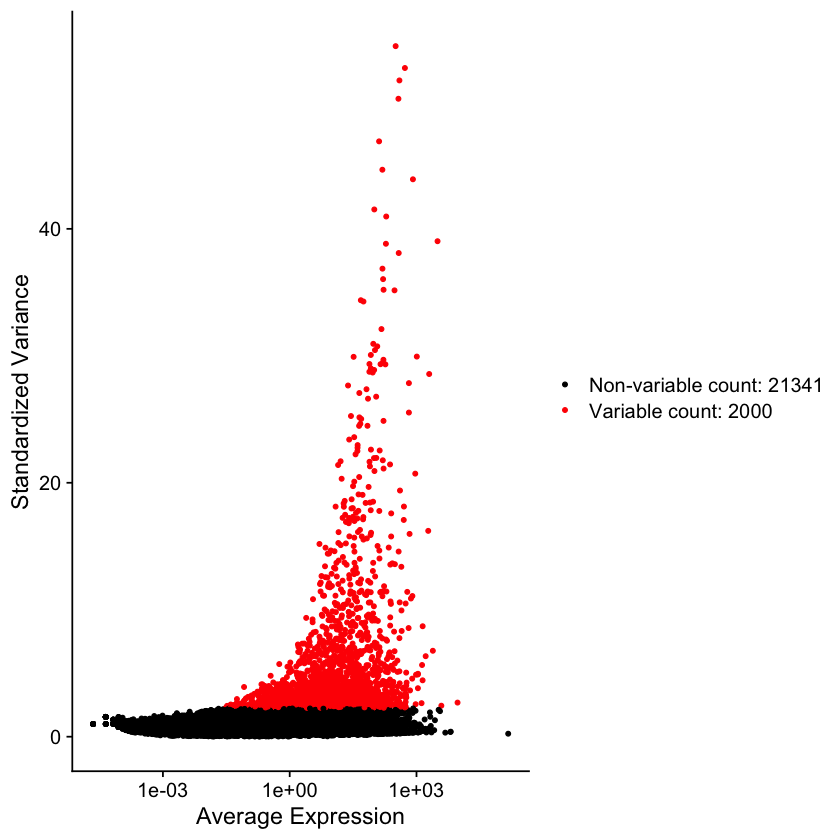

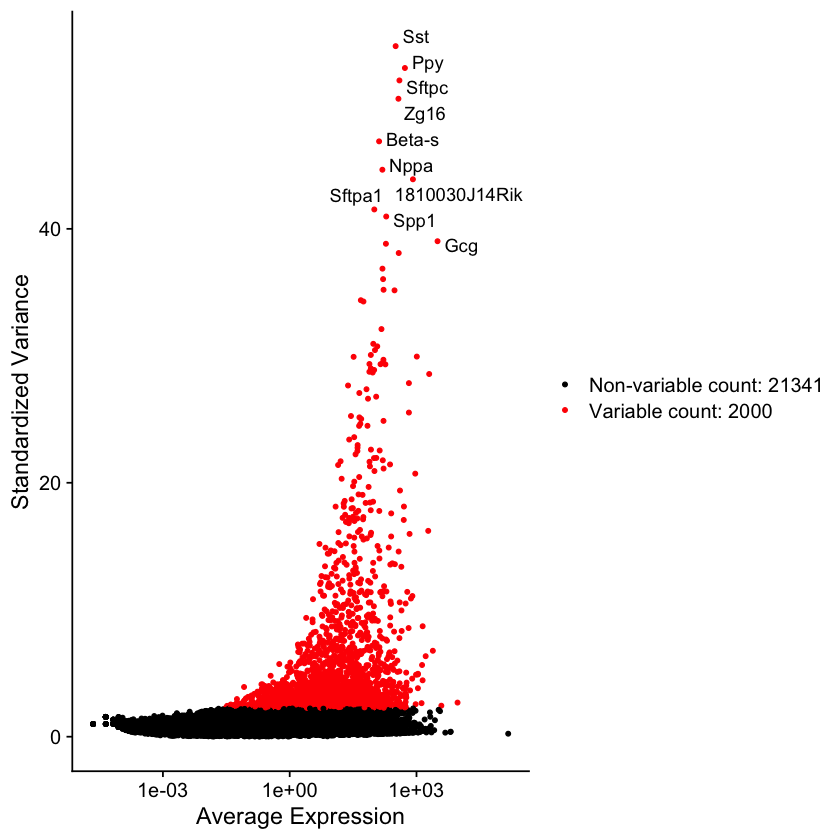

In [30]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(seu), 10)
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(seu)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 
plot2

In [31]:
# Scaling the data
all.genes <- rownames(seu)
seu <- ScaleData(seu, features = all.genes)

Centering and scaling data matrix



In [32]:
# Perform linear dimensional reduction
seu <- RunPCA(seu, features = VariableFeatures(object = seu))

PC_ 1 
Positive:  Serpina1c, Serpina1a, Serpina1b, Apoc3, Serpina3k, Serpina1d, Gm2083, Apoa1, Fabp1, Apoc4 
	   Apoa2, Bhmt, Mup3, Fga, Kng1, Apoh, Fgb, Uox, Alb, Hpx 
	   Akr1c6, Azgp1, Tat, Mbl2, Pzp, 2810007J24Rik, Cyp3a11, Serpina1e, Angptl3, Hgd 
Negative:  Olfml3, Vav1, Tmem119, Lyz2, Cd74, H2-Ab1, Csf1r, Fcrls, Dusp2, Cx3cr1 
	   Cd79b, Ltb, H2-Aa, H2-DMb1, Trem2, Gpr34, Gsn, C1qb, Eng, C1qc 
	   Siglech, H2-Eb1, P2ry12, Mmp2, P2ry13, Cav1, Cd2, Ly6c1, Satb1, Thbd 
PC_ 2 
Positive:  Lyz2, Cd74, Vav1, H2-Ab1, Ceacam1, Acp5, H2-Aa, Ltb, H2-Eb1, Cybb 
	   Napsa, Lgals3, Cd14, Plbd1, H2-DMb1, Dusp2, Epsti1, Csf1r, Ccl6, Ccl9 
	   Cd79b, Pglyrp1, Ly6d, C1qb, C1qc, Cd2, C5ar1, Hp, 1100001G20Rik, AW112010 
Negative:  Cmtm5, Olig1, Omg, Phyhipl, Hepacam, Elavl3, Gjc3, Aplp1, Gpr37, Efnb3 
	   Ugt8a, Mog, Nfasc, Ermn, Fez1, Tmem151a, Cldn11, Olig2, Kcna1, Kcnj10 
	   Sox2ot, Mobp, Nkx6-2, Slc24a2, Mapt, Glrb, Pex5l, Pcdh9, Opalin, Lgi3 
PC_ 3 
Positive:  Col1a2, Col3a1, Col1a1, Col6a2, 

PC_ 1 
Positive:  Serpina1c, Serpina1a, Serpina1b, Apoc3, Serpina3k 
Negative:  Olfml3, Vav1, Tmem119, Lyz2, Cd74 
PC_ 2 
Positive:  Lyz2, Cd74, Vav1, H2-Ab1, Ceacam1 
Negative:  Cmtm5, Olig1, Omg, Phyhipl, Hepacam 
PC_ 3 
Positive:  Col1a2, Col3a1, Col1a1, Col6a2, Mfap5 
Negative:  Car2, Cldn7, Oit1, Epcam, Prss32 
PC_ 4 
Positive:  Ppp1r16b, Csf1r, C1qb, Vav1, C1qc 
Negative:  Elf3, Epcam, Cldn7, Oit1, Krt19 
PC_ 5 
Positive:  Chgb, Scg2, Snap25, Gria2, 1700086L19Rik 
Negative:  Ermn, Mog, Opalin, Nkx6-2, Cldn11 


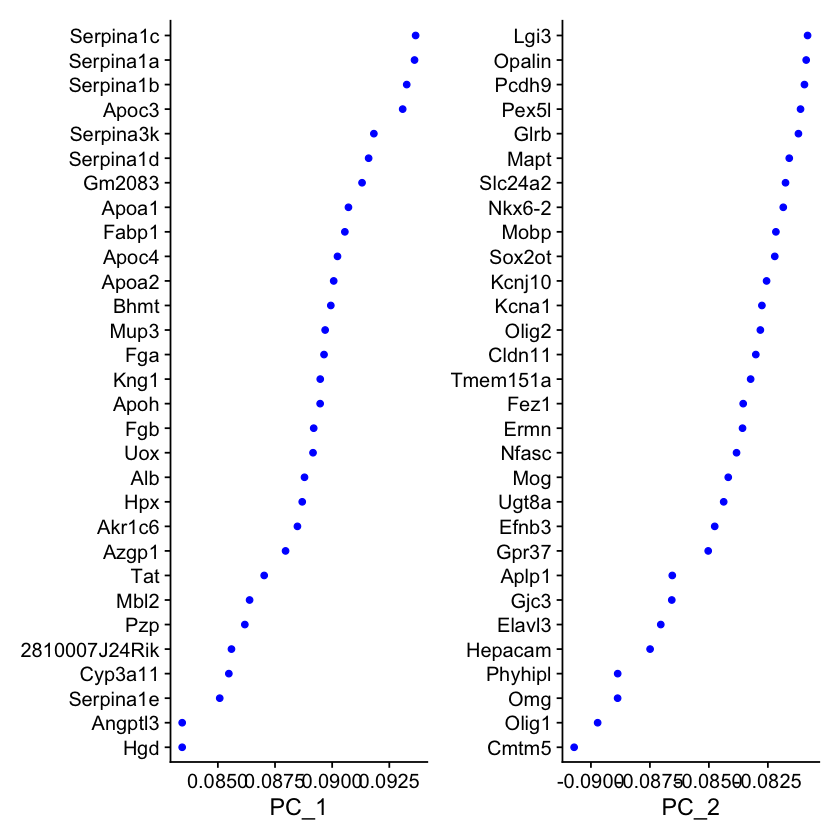

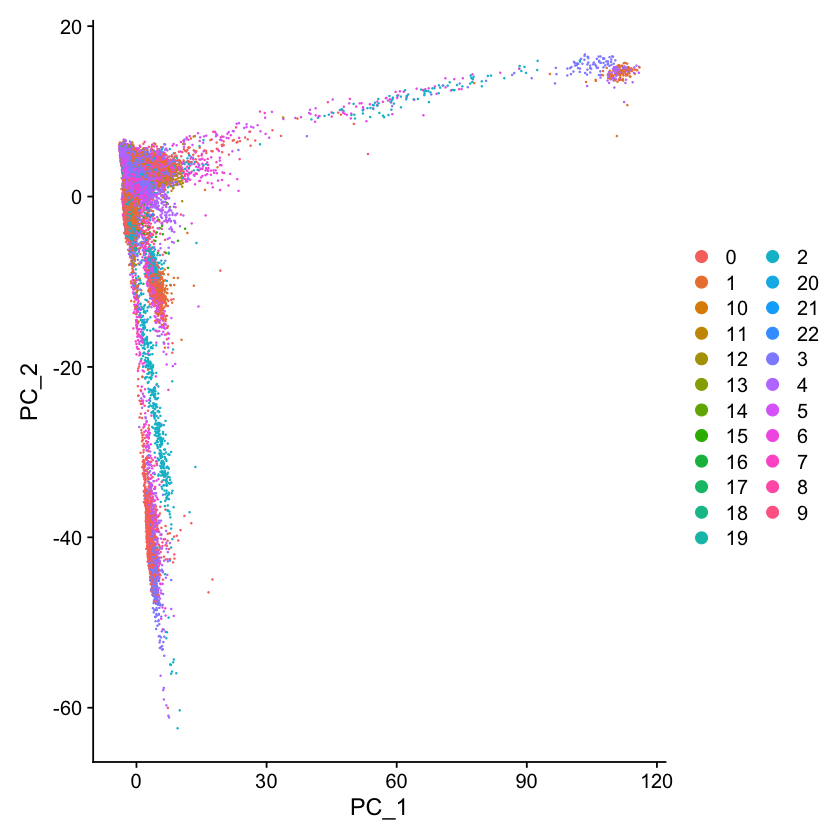

In [33]:
## visualize PCA results a few different ways
print(seu[["pca"]], dims = 1:5, nfeatures = 5)
VizDimLoadings(seu, dims = 1:2, reduction = "pca")
DimPlot(seu, reduction = "pca")

In [34]:
# Cluster the cells
seu <- FindNeighbors(seu, reduction = "pca", dims = 1:30)
seu <- FindClusters(seu, resolution = 0.5)

# Look at cluster IDs of the first 5 cells
head(Idents(seu), 5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 44949
Number of edges: 1792927

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9736
Number of communities: 47
Elapsed time: 35 seconds


Aorta_A10.MAA000595.3_9_M.1.1   Aorta_A17.B002431.3_39_F.1.1 
                             1                              6 
 Aorta_A17.MAA000594.3_8_M.1.1 Aorta_A17.MAA000906.3_11_M.1.1 
                             1                              3 
Aorta_A17.MAA000908.3_10_M.1.1 
                             3 
47 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 46

In [35]:
# Run non-linear dimensional reduction (UMAP/tSNE)
seu <- RunUMAP(seu, reduction = "pca", dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
05:37:32 UMAP embedding parameters a = 0.9922 b = 1.112

05:37:32 Read 44949 rows and found 30 numeric columns

05:37:32 Using Annoy for neighbor search, n_neighbors = 30

05:37:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

05:38:08 Writing NN index file to temp file /var/folders/_p/d0xj9bm96j5_mn_8lvrc6nyc0000gn/T//RtmpKSF7aE/file3ec6c6160f5

05:38:09 Searching Annoy index using 1 thread, search_k = 3000

05:39:23 Annoy recall = 100%

05:39:27 Commencing smooth kNN distance calibrat

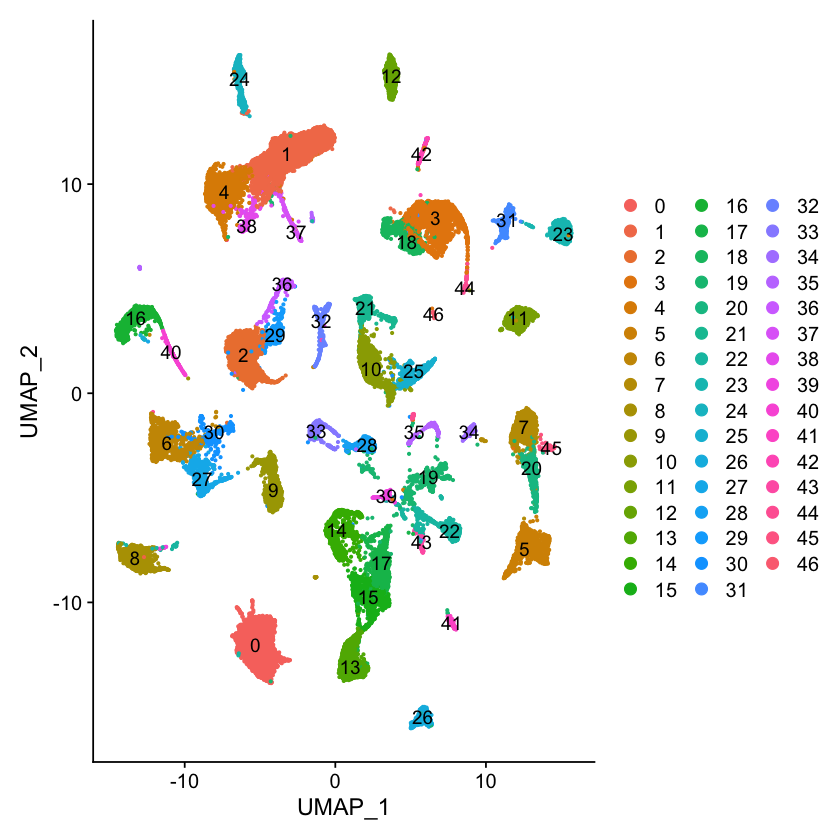

In [39]:
DimPlot(seu, reduction = "umap", pt.size = 0.5, label = TRUE)

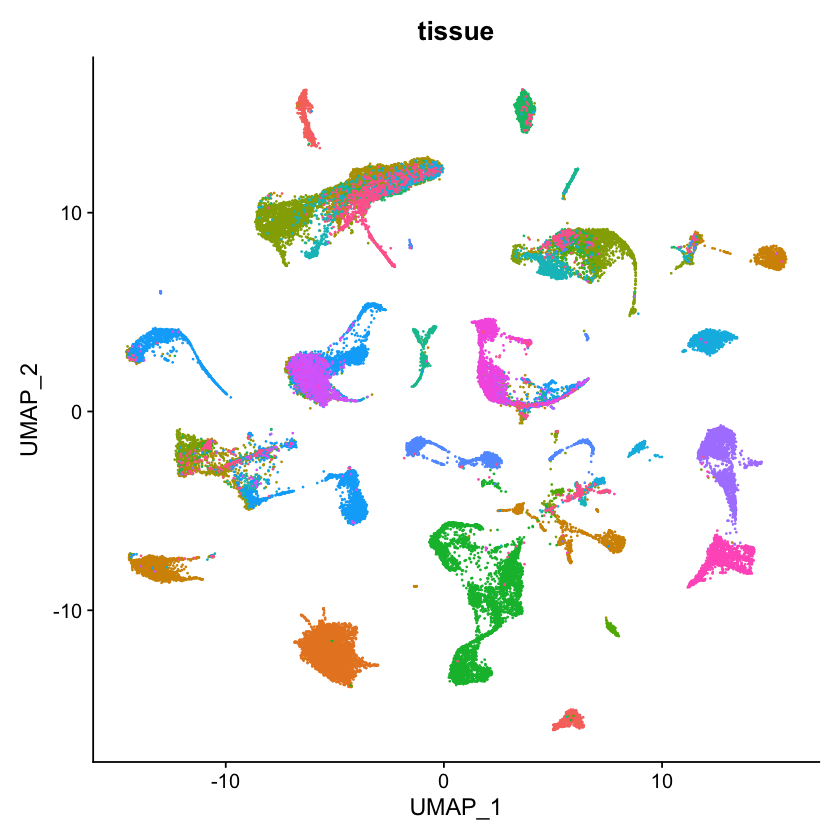

In [36]:
DimPlot(seu, reduction = "umap", group.by = "tissue", pr.size = 0.5, label = TRUE) +
    NoLegend()

In [37]:
seu <- RunTSNE(seu, reduction = "pca", dims = 1:30)

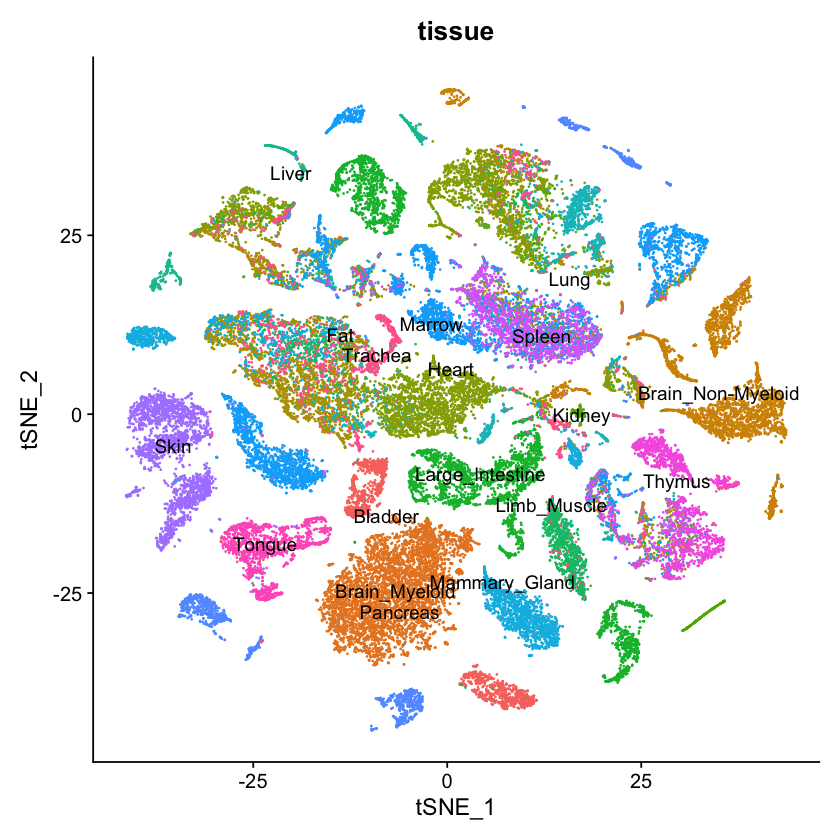

In [38]:
DimPlot(object = seu, reduction = "tsne", group.by = "tissue", pt.size = 0.5,
    label = TRUE) + NoLegend()

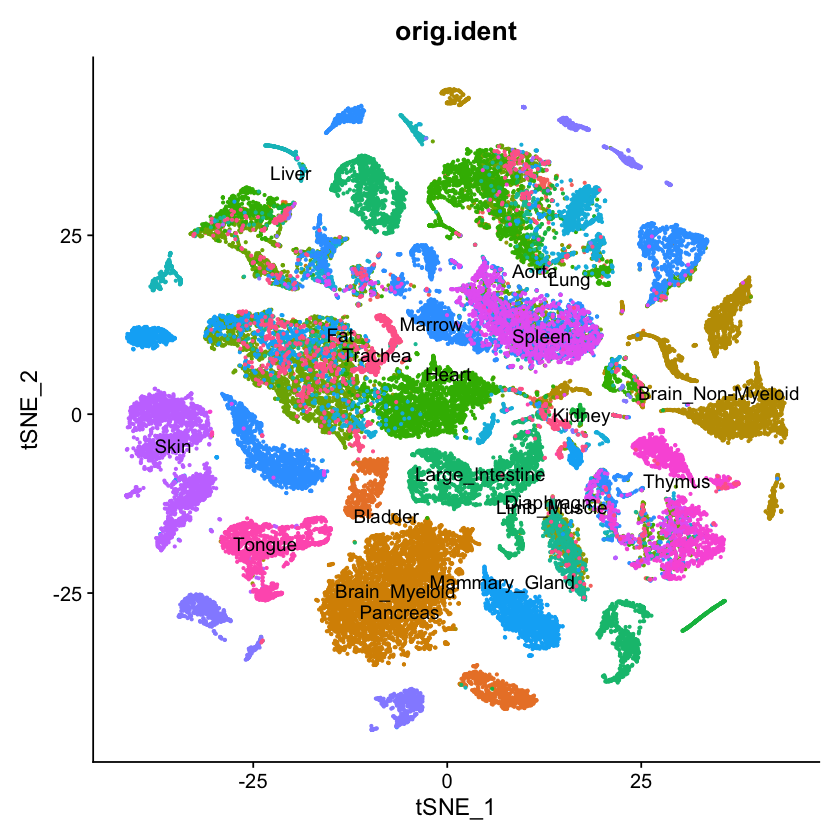

In [42]:
DimPlot(object = seu, reduction = "tsne", group.by = "orig.ident", pt.size = 0.5,
    label = TRUE) + NoLegend()

## Exploring the data


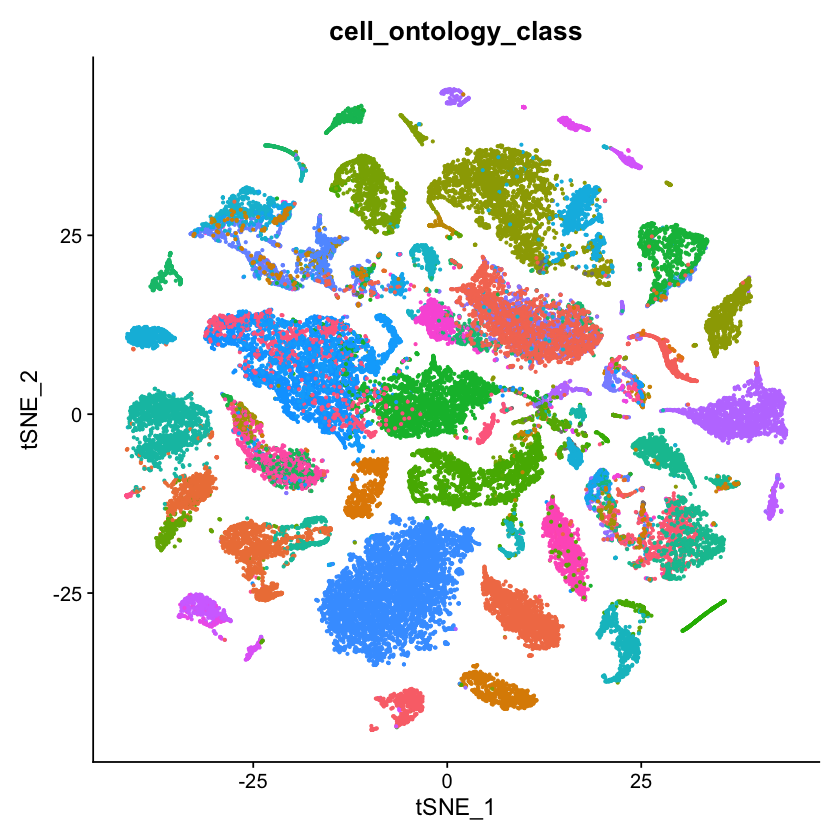

In [53]:
p <- DimPlot(object = seu, reduction = "tsne", group.by = "cell_ontology_class", pt.size = 0.5,
    label = FALSE) + NoLegend()
p

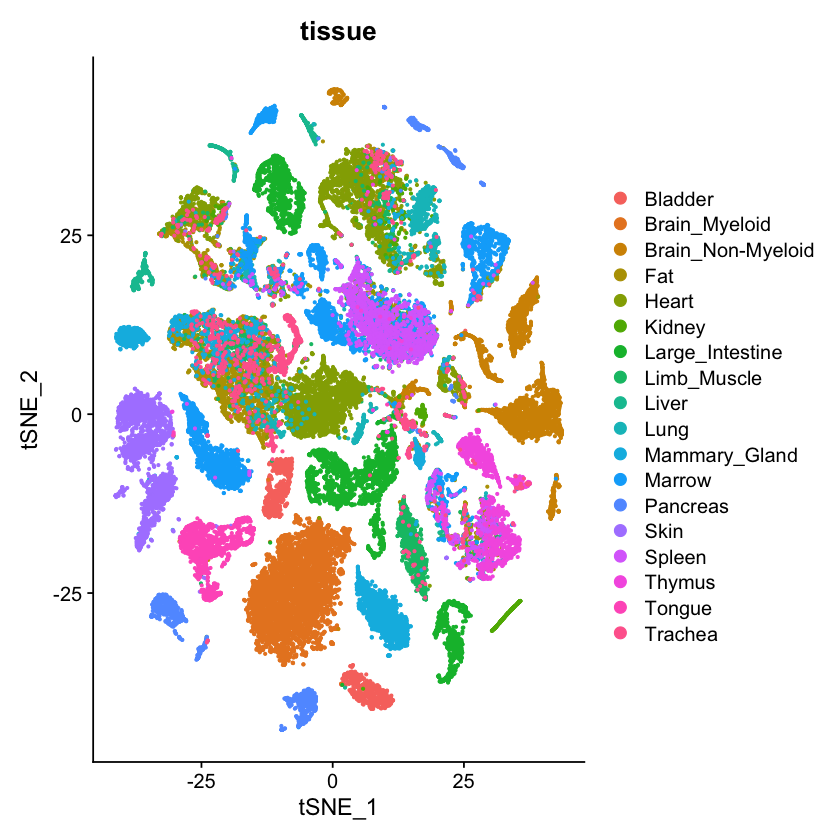

In [48]:
p <- DimPlot(object = seu, reduction = "tsne", group.by = "tissue", pt.size = 0.5,
    label = FALSE)
p

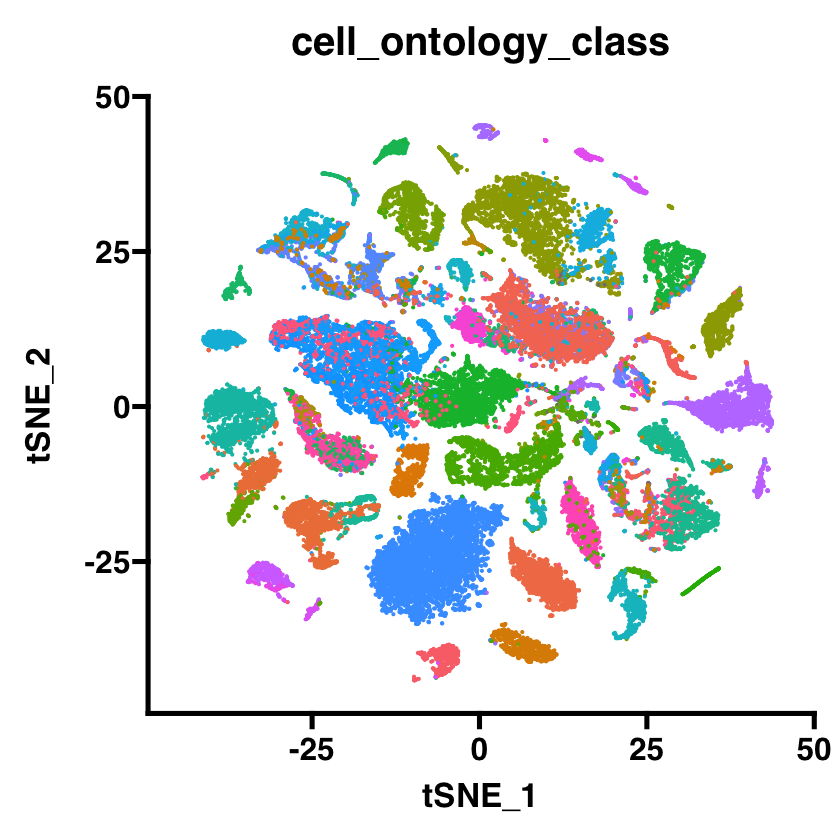

In [54]:
p + theme_prism(base_size = 20) + NoLegend() + scale_x_continuous(limits = c(-49.5,
    50), expand = c(0, 0)) + scale_y_continuous(limits = c(-49.5, 50), expand = c(0,
    0))

[[1]]


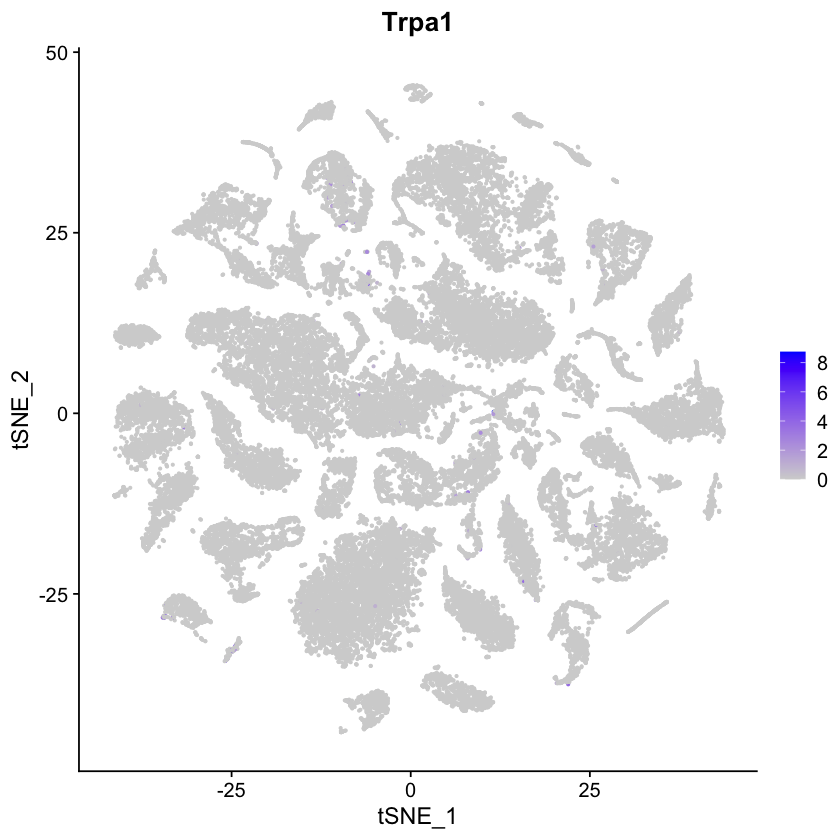

In [60]:
p <- FeaturePlot(seu, reduction = "tsne", features = c("Trpa1"), pt.size = 0.5,
    combine = FALSE)
p

[[1]]

[[2]]


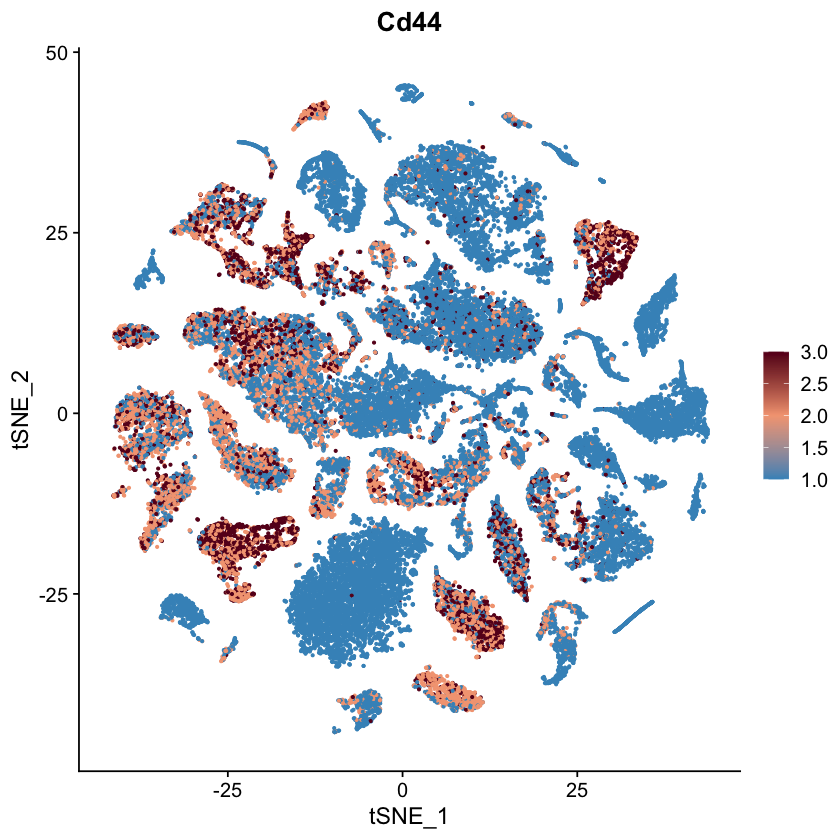

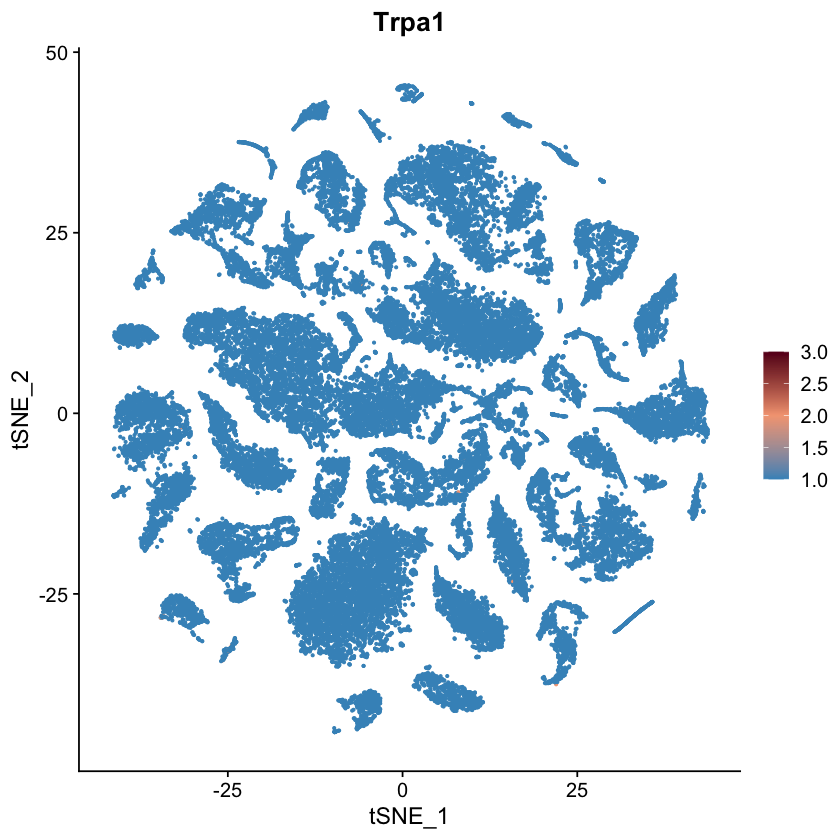

In [58]:
p <- FeaturePlot(seu, reduction = "tsne", features = c("Cd44", "Trpa1"), pt.size = 0.5,
    cols = c("#4393C3FF", "#F4A582FF", "#67001FFF"), combine = FALSE)
p

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



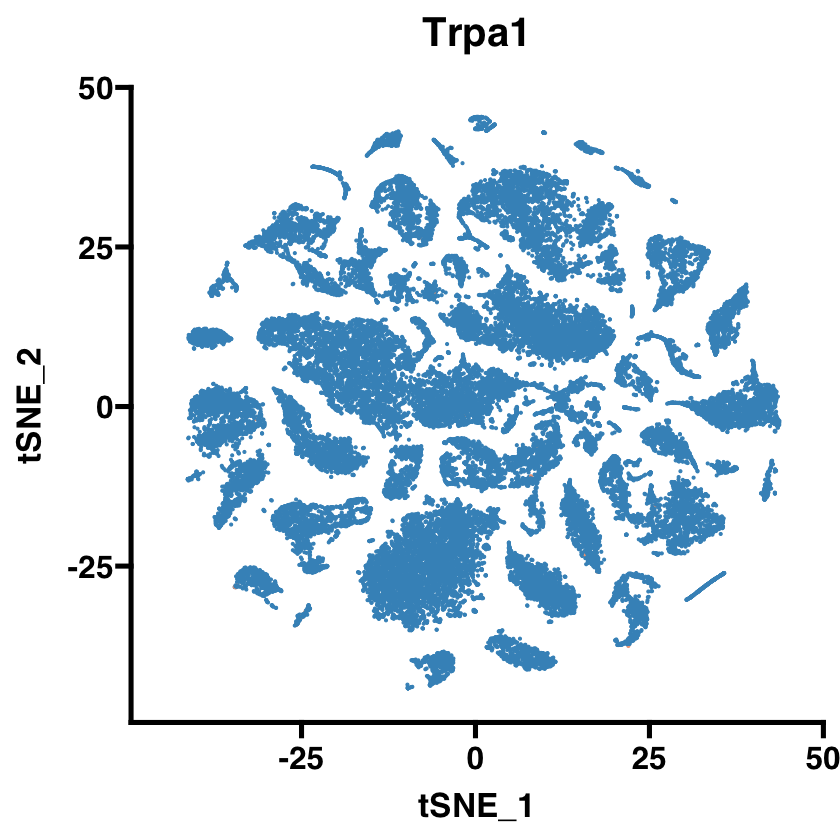

In [59]:
p[[2]] + theme_prism(base_size = 20) + NoLegend() + scale_x_continuous(limits = c(-49.5,
    50), expand = c(0, 0)) + scale_y_continuous(limits = c(-49.5, 50), expand = c(0,
    0))

## Save figures 

In [11]:
ggsave(filename = "1.png", width = 24, height = 12, units = "in", dpi = 600)